# Project 3 Stereo camera calibration

This week you'll be provided with a set of stereo images, and your task is to undistort and rectify the images, such that they can be used with the stereo depth reconstruction you made on day 6. You are still not allowed to use opencv functions for block matching/template matching, however you are free to use opencv when undistorting the images. It is recommended that you finish the exercises from Monday before continuing with the weekly project.

The image sets are found in the attached zip-file. Start with the rs.zip and move on to mynteye.zip once you have it working. The physical dimensions of each square of the pattern are 33.6 x 33.6 mm.

Hint: You'll have to undistort the images before rectifying them.

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn import linear_model

### 1 Rectify the image

First we need to extract matching points from different images, needed to estimate the K matrix.
- Also, assume the K matrix is the same for both cameras (same camera!)

In [15]:
"""
Implement the number of vertical and horizontal corners
"""
nb_vertical = 9
nb_horizontal = 6


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('rs/left*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    """
    Implement findChessboardCorners here
    """
    ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        #cv2.waitKey(500)

cv2.destroyAllWindows()

Using the extracted corners we can obtain a camera matrix that contains the information needed to undistort images

In [16]:
ret, mtx_left, dist_left, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('rs/left-0000.png')
h,  w = img.shape[:2]
K_left, roi = cv2.getOptimalNewCameraMatrix(mtx_left,dist_left,(w,h),1,(w,h))

Text(0.5, 1.0, 'Undistorted image')

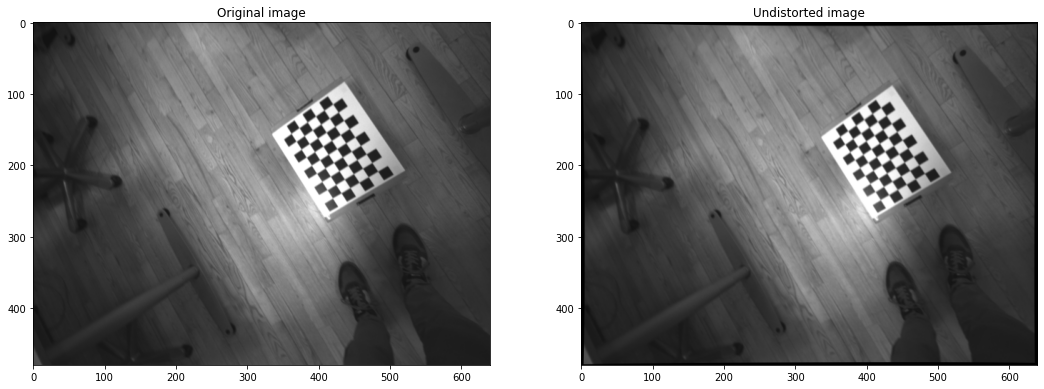

In [17]:
# undistort
dst = cv2.undistort(img, mtx_left, dist_left, None, K_left)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

Now with the right images

In [19]:
"""
Implement the number of vertical and horizontal corners
"""
nb_vertical = 9
nb_horizontal = 6


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('rs/right*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    """
    Implement findChessboardCorners here
    """
    ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))
    
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        #cv2.waitKey(500)

cv2.destroyAllWindows()

In [20]:
ret, mtx_right, dist_right, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
img = cv2.imread('rs/right-0000.png')
h,  w = img.shape[:2]
K_right, roi = cv2.getOptimalNewCameraMatrix(mtx_right,dist_right,(w,h),1,(w,h))

In [21]:
K_right, mtx_right, dist_right

(array([[368.22756958,   0.        , 322.73204455],
        [  0.        , 368.8453064 , 245.85216099],
        [  0.        ,   0.        ,   1.        ]]),
 array([[375.12051579,   0.        , 321.7664807 ],
        [  0.        , 375.43831995, 244.0632177 ],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-0.0027914 , -0.01328751,  0.00292249,  0.00138688,  0.00552691]]))

In [22]:
K_left, mtx_left, dist_left

(array([[365.89266968,   0.        , 324.62721633],
        [  0.        , 366.50601196, 247.47156052],
        [  0.        ,   0.        ,   1.        ]]),
 array([[374.15541242,   0.        , 322.54590143],
        [  0.        , 374.76827228, 245.03655094],
        [  0.        ,   0.        ,   1.        ]]),
 array([[-0.00355685, -0.00809662,  0.00356797,  0.00232191,  0.00040122]]))

Text(0.5, 1.0, 'Undistorted image')

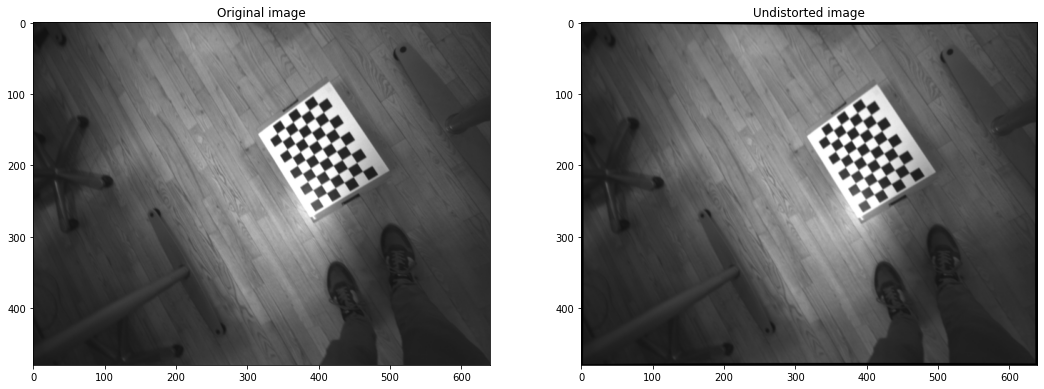

In [23]:
# undistort
dst = cv2.undistort(img, mtx_right, dist_right, None, K_right)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

### 2 - rectify the images!